# MACHINE LEARNING PROJECT

## Steps

1. Importing the libraries and data
2. Exploration of the dataset 
  - Numerical features
  - Categorical features
3. Features engineering
  - Gender
  - Age
4. Encoding categorical features
  - Manually
  - One-Hot-Encoder
5. Missing values
  - Knn Imputer
6. Outliers
7. Index
8. Feature selection
  - All features
  - Correlation Matrix
  - Recursive feature elimination
9. Modeling
  - Logistic regression
  - Naive Bayes
  - Knn
  - Neural Network
  - SGD Classifier
  - Perceptron
  - Support Vector Machine
  - Decision tree
  - Random Forest
  - Gradient Boosting
  - Bagging

### Possibilities considered

3 approaches for nan:
- knn imputer
- drop
- mode

3 approaches for standardization
- standard
- minmax
- robust

4 approaches for choice of variables
- all of them
- rfe
- correlation matrix

2 approaches for outliers
- leave them
- drop them

# 1. Importing the libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.impute import KNNImputer

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

# Setting the theme for the plots
sns.set_theme()

In [2]:
# Importing the file into a pandas dataframe
newland = pd.read_excel('Train.xlsx')

# 2. Exploration of the variables

Creating functions

In [3]:
def countplot(data, variable):
    print(len(data[variable].unique()),'unique values:',data[variable].unique())
    print(data[variable].value_counts())
    plt.figure(figsize=(6, 4))
    sns.countplot(x=variable, data=data, orient='h')
    plt.title(variable)
    plt.xticks(rotation=-45)
    plt.show()
    
    
def correlation_matrix(data):
    # Prepare figure
    fig = plt.figure(figsize=(10, 8))
    # Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
    corr = np.round(data.corr(method="pearson"), decimals=2)

    # Build annotation matrix (values above |0.5| will appear annotated in the plot)
    mask_annot = np.absolute(corr.values) >= 0.5
    annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

    # Plot heatmap of the correlation matrix
    sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

    # Layout
    fig.subplots_adjust(top=0.95)
    fig.suptitle("Correlation Matrix", fontsize=20)

    plt.show()
    
    
def pairplot(data):
    sns.pairplot(data)
    plt.show()

def histogram(data):
    for i in data.columns:
        plt.figure(figsize=(6, 4))
        sns.displot(newland, x=i, kind="kde")
        plt.title(i)
        plt.show()

def boxplot(data):  
    for i in data.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=newland, x=i)
        plt.title(i)
        plt.show()


# Creating a plot to visualize categorical variable

def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

In [4]:
newland.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1


In [5]:
newland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CITIZEN_ID              22400 non-null  int64 
 1   Name                    22400 non-null  object
 2   Birthday                22400 non-null  object
 3   Native Continent        22400 non-null  object
 4   Marital Status          22400 non-null  object
 5   Lives with              22400 non-null  object
 6   Base Area               22400 non-null  object
 7   Education Level         22400 non-null  object
 8   Years of Education      22400 non-null  int64 
 9   Employment Sector       22400 non-null  object
 10  Role                    22400 non-null  object
 11  Working Hours per week  22400 non-null  int64 
 12  Money Received          22400 non-null  int64 
 13  Ticket Price            22400 non-null  int64 
 14  Income                  22400 non-null  int64 
dtypes:

## Numerical features

In [6]:
# defining metric and non-metric features
metric_features = ['Years of Education','Working Hours per week','Money Received','Ticket Price','Income']
non_metric_features = ['Name','Birthday','Native Continent','Marital Status','Lives with','Base Area','Education Level','Employment Sector','Role']

         CITIZEN_ID  Years of Education  Working Hours per week  \
count  22400.000000        22400.000000            22400.000000   
mean   23685.500000           13.173884               40.483795   
std     6466.467351            2.512451               12.370921   
min    12486.000000            2.000000                1.000000   
25%    18085.750000           12.000000               40.000000   
50%    23685.500000           13.000000               40.000000   
75%    29285.250000           15.000000               45.000000   
max    34885.000000           21.000000               99.000000   

       Money Received  Ticket Price        Income  
count    22400.000000  22400.000000  22400.000000  
mean      1324.915357    109.145313      0.237098  
std       9227.771813    500.208904      0.425313  
min          0.000000      0.000000      0.000000  
25%          0.000000      0.000000      0.000000  
50%          0.000000      0.000000      0.000000  
75%          0.000000      0.000

<Figure size 432x288 with 0 Axes>

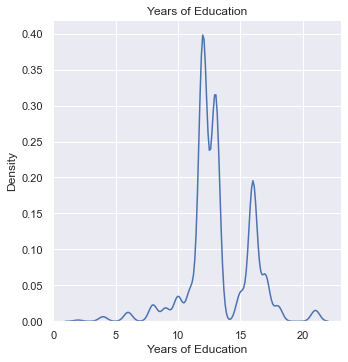

<Figure size 432x288 with 0 Axes>

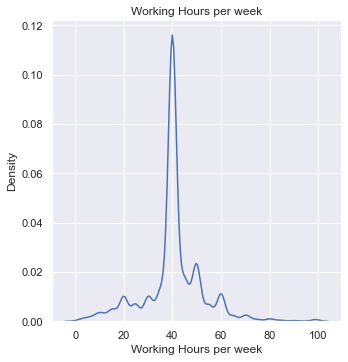

<Figure size 432x288 with 0 Axes>

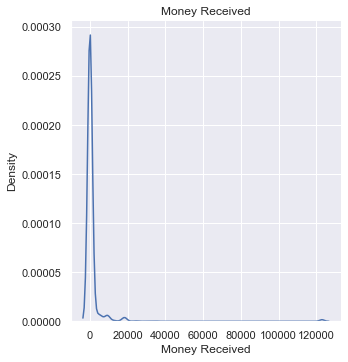

<Figure size 432x288 with 0 Axes>

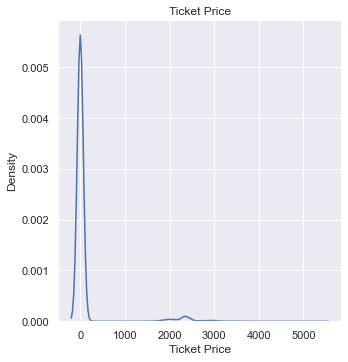

<Figure size 432x288 with 0 Axes>

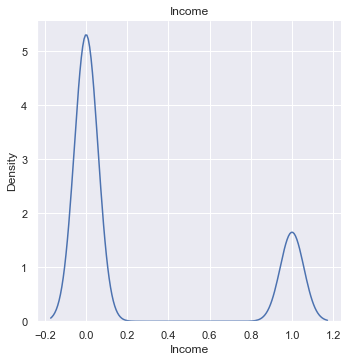

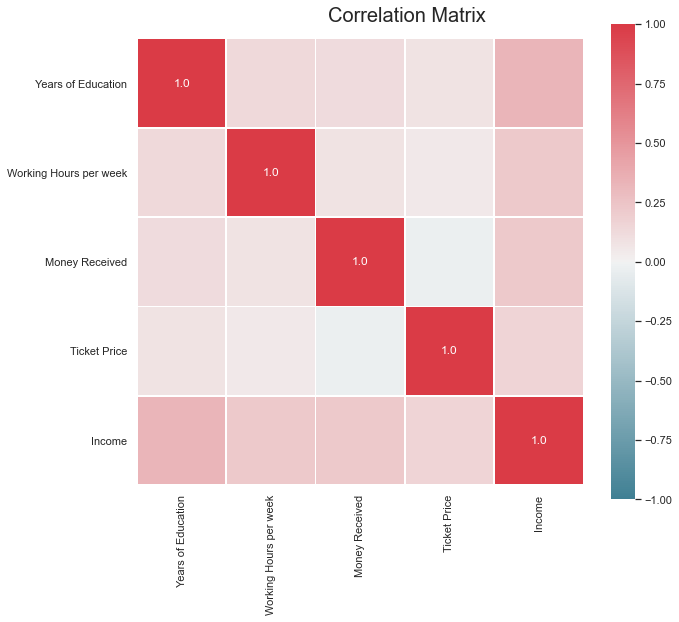

In [7]:
# Statistical informations of the numerical variables
print(newland.describe())

histogram(newland[metric_features])
correlation_matrix(newland[metric_features])

## Categorical features

In [8]:
newland.describe(include =['O'])

,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Employment Sector,Role
count,22400,22400,22400,22400,22400,22400,22400,22400,22400
unique,16074,11257,5,7,6,40,16,9,15
top,Mr. Stewart Jackson,"August 15,2025",Europe,Married,Wife,Northbury,Professional School,Private Sector - Services,Professor
freq,4,9,19111,10219,9012,20074,7232,15599,2849


In [ ]:
histogram()

# 3. Features engineering

## Variable Gender

In [9]:
# Creating a new variable for the gender
newland['Gender'] = newland['Name'].str.split(n=2,expand=True).rename(columns={0:'Gender'}).drop(columns=[1,2])

# Counting the unique values
newland['Gender'].value_counts()


# Replacing the values in the variable Gender
# econding the categorical values in numerical

# Male: 0
# Female: 1

newland['Gender'] = newland['Gender'].replace('Mr.', 0)
newland['Gender'] = newland['Gender'].replace('Mrs.', 1)
newland['Gender'] = newland['Gender'].replace('Miss', 1)


# countplot(newland, 'Gender')

## Variable Age

<Figure size 720x576 with 0 Axes>

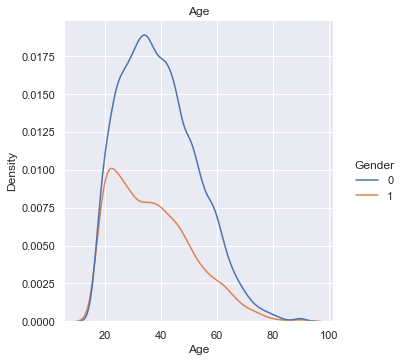

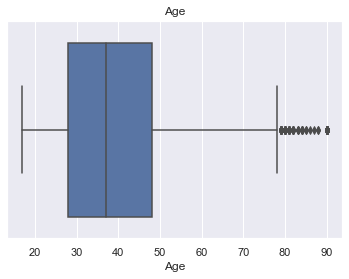

In [10]:
# Considering only the year

# Creating 2 new variables, Year of birthday and Age
newland['year_of_birth'] = newland['Birthday'].map(lambda x: int(x[-4:]))
newland['Age'] = newland['year_of_birth'].map(lambda x: 2048 - x)

# Deleting the variable with the year of birthday
del newland['year_of_birth']


# Plotting the distribution for the age
plt.figure(figsize=(10, 8))
sns.displot(newland, x='Age', kind="kde", hue='Gender')
plt.title('Age')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=newland, x='Age')
plt.title('Age')
plt.show()

Deleting useless variables, Name and Birthday

In [11]:
# deleting the variables Name and Birthday, they are not directly relevant to predict the target
del newland['Name']
del newland['Birthday']

# 4. Encoding categorical features

Encoding some variables manually

In [12]:
# Creating a copy of the dataset
newland_labels = newland.copy()


# Encoding the variable Education Level manually (it will be numerical because it's categorical but ordinal)
newland_labels['Education Level'] = newland_labels['Education Level'].replace(['Preschool',
'Primary School',
'Middle School - 1st Cycle',
'Middle School - 2nd Cycle',
'Middle School Complete',
'High School - 1st Cycle',
'High School - 2nd Cycle',
'Professional School',
'High School Complete',
'Professional School + PostGraduation',
'High School + PostGraduation',
'Bachelors',
'Bachelors + PostGraduation',
'Masters',
'Masters + PostGraduation',
'PhD'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])


# Encoding manually
# Replacing the values in some labels manually

newland_labels['Native Continent'] = newland_labels['Native Continent'].replace(['Asia', 'America', 'Oceania'], 'Other')

newland_labels['Marital Status'] = newland_labels['Marital Status'].replace(['Married - Spouse Missing', 'Separated', 'Widow', 'Married - Spouse in the Army'], 'Other')

newland_labels['Lives with'] = newland_labels['Lives with'].replace(['Wife', 'Husband'], 'Wife / Husband')

newland_labels['Base Area'] = newland_labels['Base Area'].replace(['Auchenshuggle', 'Sharnwick', 'Laewaes',
       'MillerVille', 'Fanfoss', 'Wigston', 'Aerilon', 'Watford',
       "Knife's Edge", 'Lanercost', 'Bellmoral', 'Bellenau', 'Butterpond',
       'Laenteglos', 'Tranmere', 'Eelry', 'Alverton', 'Pran', 'Willesden',
       "King's Watch", 'Kald', 'Kirkwall', "Fool's March",
       'Middlesbrough', 'Orilon', 'Aroonshire', 'Aberuthven', 'Lewes',
       'Marnmouth', 'Mensfield', 'Sharpton', 'Cherrytown', 'Redwick Bush',
       'Drumchapel', 'Carlisle', 'Conriston', 'Woodpine', 'Ironforge'], 'Other')

newland_labels['Employment Sector'] = newland_labels['Employment Sector'].replace(['Private Sector - Others',
       'Self-Employed (Company)', 'Public Sector - Government',
       'Unemployed', 'Never Worked'], 'Other')

In [13]:
newland = newland_labels.copy()

## One Hot Encoder

In [14]:
# One Hot Encoder 

newland_ohc = newland.copy()


# Updating metric and non-metric features
# Education level now is a metric feature
metric_features = ['Years of Education','Working Hours per week','Money Received','Ticket Price', 'Age', 'Sex', 'Income']
non_metric_features = ['Native Continent','Marital Status','Lives with','Base Area','Employment Sector','Role']

ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(newland_ohc[non_metric_features])
ohc_feat_names = ohc.get_feature_names(non_metric_features)
ohc_df = pd.DataFrame(ohc_feat, index=newland_ohc.index, columns=ohc_feat_names)

newland_ohc1 = pd.concat([newland_ohc.drop(columns=non_metric_features), ohc_df], axis=1)

newland = newland_ohc1.copy()

# 5. Missing values (generation)

In [15]:
# Missing values
# 
# Defining the variables to change to nan (based on the ?)
Base_Area_to_replace = ['Base Area_Northbury','Base Area_Other']
Employment_Sector_to_replace = ['Employment Sector_Other','Employment Sector_Private Sector - Services ','Employment Sector_Public Sector - Others','Employment Sector_Self-Employed (Individual)']
Role_to_replace = ['Role_Administratives', 'Role_Agriculture and Fishing', 'Role_Army','Role_Cleaners & Handlers', 'Role_Household Services', 'Role_IT','Role_Machine Operators & Inspectors', 'Role_Management','Role_Other services', 'Role_Professor', 'Role_Repair & constructions','Role_Sales', 'Role_Security', 'Role_Transports']

# Defining the nan values
newland.loc[newland['Base Area_?'] == 1.0, Base_Area_to_replace] = np.nan
newland.loc[newland['Employment Sector_?'] == 1.0, Employment_Sector_to_replace] = np.nan
newland.loc[newland['Role_?'] == 1.0, Role_to_replace] = np.nan

# Dropping the variables with the question mark
newland.drop(columns=['Base Area_?','Employment Sector_?','Role_?'], inplace = True)

# For the problem of the linearity, dropping 1 variable for each previous variable
newland.drop(['Native Continent_Africa', 'Marital Status_Divorced', 'Lives with_Alone','Base Area_Other', 'Employment Sector_Other', 'Role_Army'], axis = 1, inplace = True)

## KNN Imputer for the Nan

In [16]:
# Knn Imputer

newland_knn = newland.copy()
imputer = KNNImputer(n_neighbors = 5, weights = 'uniform')
newland_knn = imputer.fit_transform(newland_knn)
newland_knn = pd.DataFrame(newland_knn, columns = newland.columns )

changing_values = ['Base Area_Northbury',
       'Employment Sector_Private Sector - Services ',
       'Employment Sector_Public Sector - Others',
       'Employment Sector_Self-Employed (Individual)',
       'Role_Agriculture and Fishing', 'Role_Administratives', 'Role_Cleaners & Handlers',
       'Role_Household Services', 'Role_IT',
       'Role_Machine Operators & Inspectors', 'Role_Management',
       'Role_Other services', 'Role_Professor', 'Role_Repair & constructions',
       'Role_Sales', 'Role_Security', 'Role_Transports']


for variable in changing_values:
    newland_knn[variable] = np.round(newland_knn[variable])


newland = newland_knn.copy()

# 6. Outliers

In [17]:
newland_outliers = newland.copy()

In [18]:
variables_for_outliers = ['Years of Education',
       'Working Hours per week']

newland = newland.reset_index(drop=True)


lower_lim = newland[variables_for_outliers].quantile(.01)
upper_lim = newland[variables_for_outliers].quantile(.99)

filters = []
for metric in variables_for_outliers:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters.append(newland[metric].between(llim, ulim, inclusive=True))

filters = pd.Series(np.all(filters, 0))
newland_outliers = newland[filters]
print('Percentage of data kept after removing outliers:', np.round(newland_outliers.shape[0] / newland.shape[0], 4))

Percentage of data kept after removing outliers: 0.9776


In [19]:
# copy the result to newland
newland = newland_outliers.copy()

# 7. Index of the dataset

In [20]:
# Setting the index in the dataset
newland = newland.set_index('CITIZEN_ID')

# 8. Feature selection

## All variables

In [112]:
newland_all_features = newland.copy()

## Correlation matrix

In [113]:
newland_corr_matrix = newland.copy()

In [217]:
corr = newland_corr_matrix.corr()

corr[corr['Income'] > 0.1].index

Index(['Education Level', 'Years of Education', 'Working Hours per week',
       'Money Received', 'Ticket Price', 'Income', 'Age',
       'Marital Status_Married', 'Lives with_Wife / Husband',
       'Employment Sector_Other', 'Role_Management', 'Role_Professor'],
      dtype='object')

In [218]:
corr[corr['Income'] < -0.1].index

Index(['Gender', 'Marital Status_Other', 'Marital Status_Single',
       'Lives with_Children', 'Lives with_Other Family',
       'Employment Sector_Private Sector - Services ', 'Role_Other services'],
      dtype='object')

In [114]:
newland_corr_matrix = newland_corr_matrix[['Education Level', 'Years of Education', 'Working Hours per week',
       'Money Received', 'Ticket Price', 'Income', 'Age',
       'Marital Status_Married', 'Lives with_Wife / Husband',
       'Employment Sector_Other', 'Role_Management', 'Role_Professor', 'Gender', 'Marital Status_Other', 'Marital Status_Single',
       'Lives with_Children', 'Lives with_Other Family',
       'Employment Sector_Private Sector - Services ', 'Role_Other services']]

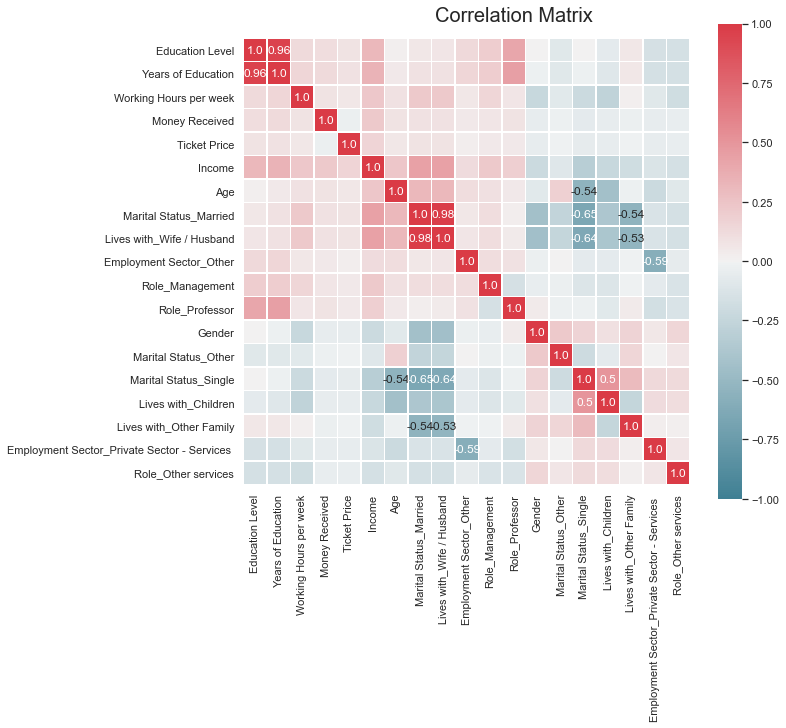

In [29]:
correlation_matrix(newland_corr_matrix)

In [115]:
# Deleting Years of education and x1_married~

newland_corr_matrix = newland_corr_matrix[['Education Level', 'Working Hours per week',
       'Money Received', 'Ticket Price', 'Income', 'Age', 'Lives with_Wife / Husband',
       'Employment Sector_Other', 'Role_Management', 'Role_Professor', 'Gender', 'Marital Status_Other', 'Marital Status_Single',
       'Lives with_Children', 'Lives with_Other Family',
       'Employment Sector_Private Sector - Services ', 'Role_Other services']]

## Recursive features elimination (RFE)

In [116]:
# RFE
# 
#  Using gradient boosting

newland_RFE = newland[['Education Level', 'Working Hours per week', 'Money Received',
       'Ticket Price', 'Age', 'Lives with_Wife / Husband',
       'Employment Sector_Other', 'Role_Management', 'Role_Professor',
       'Gender', 'Marital Status_Single',
       'Employment Sector_Private Sector - Services ', 'Role_Other services', 'Income']]

# 9. Modeling

In [117]:
# Splitting the dataset in 2: input and output


# X = newland_all_features.drop(['Income'], axis=1)
# Y = newland_all_features['Income']


X = newland_corr_matrix.drop(['Income'], axis=1)
Y = newland_corr_matrix['Income']


# X = newland_RFE.drop(['Income'], axis=1)
# Y = newland_RFE['Income']



# Now, splitting the dataset into train-set and validation-set

X_train, X_validation,y_train, y_validation = train_test_split(X,Y,
                                                               train_size = 0.75, 
                                                               shuffle = True, 
                                                               stratify = Y)

In [118]:
# Standardization of the variables with the robust scaler
robust = RobustScaler().fit(X_train)
X_train_robust = pd.DataFrame(robust.transform(X_train), columns=X_train.columns, index = X_train.index)
X_validation_robust = pd.DataFrame(robust.transform(X_validation), columns=X_validation.columns, index = X_validation.index)

X_train = X_train_robust
X_validation = X_validation_robust

## Logistic regression

In [119]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_prediction = log_model.predict(X_validation)
log_f1 = round(f1_score(y_true = y_validation, y_pred = y_prediction, average='micro')*100, 3)

## Neural Network Model

In [120]:
model = MLPClassifier()
# model = MLPClassifier(activation='tanh')
# model = MLPClassifier(activation='tanh', solver='sgd', learning_rate='adaptive', learning_rate_init=0.001, batch_size=50, max_iter=300)
model.fit(X_train, y_train)
y_prediction = model.predict(X_validation)
NN_F1 = round(f1_score(y_true = y_validation, y_pred = y_prediction, average='micro')*100, 3)

## SGD Classifier

In [121]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_prediction = sgd.predict(X_validation)
SGD_F1 = round(f1_score(y_true = y_validation, y_pred = y_prediction, average='micro')*100, 3)

## Random Forest Classifier

In [122]:
random_forest = RandomForestClassifier(criterion='gini', min_samples_leaf=2, min_samples_split=7, n_estimators=100)
random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_validation)
Random_Forest_F1 = round(f1_score(y_true = y_validation, y_pred = y_prediction, average='micro')*100, 3)

## KNN Classifier

In [123]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
y_prediction = knn.predict(X_validation)  
KNN_F1 = round(f1_score(y_true = y_validation, y_pred = y_prediction, average='micro')*100, 3)

## Naive Bayes

In [124]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  
y_prediction = gaussian.predict(X_validation)  
Naive_Bayes_F1 = round(f1_score(y_true = y_validation, y_pred = y_prediction, average='micro')*100, 3)

## Decision tree

In [125]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
y_prediction = decision_tree.predict(X_validation)  
DT_F1 = round(f1_score(y_true = y_validation, y_pred = y_prediction, average='micro')*100, 3)

## Linear support vector machine

In [126]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_prediction = linear_svc.predict(X_validation)
SVC_F1 = round(f1_score(y_true = y_validation, y_pred = y_prediction, average='micro')*100, 3)

## Perceptron

In [127]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)
y_prediction = perceptron.predict(X_validation)
Perceptron_F1 = round(f1_score(y_true = y_validation, y_pred = y_prediction, average='micro')*100, 3)

## Gradient Boosting

In [128]:
gb_model = GradientBoostingClassifier(ccp_alpha= 0,
                                    criterion= 'friedman_mse',
                                    learning_rate= 0.2,
                                    loss= 'deviance',
                                    min_samples_leaf= 1,
                                    min_samples_split= 4,
                                    n_estimators= 100,
                                    random_state= 5)

gb_model.fit(X_train, y_train)
y_prediction = gb_model.predict(X_validation)  
GradientBoosting_F1 = round(f1_score(y_true = y_validation, y_pred = y_prediction, average='micro')*100, 3)

## Bagging classifier for Neural network

In [80]:
bagging_NN = BaggingClassifier(base_estimator = model, n_estimators = 20,random_state = 5)
bagging_NN.fit(X_train, y_train)
y_prediction = bagging_NN.predict(X_validation) 
Bagging_NN_F1 = round(f1_score(y_true = y_validation, y_pred = y_prediction, average='micro')*100, 3)

# Which is the best model?

In [38]:
# Selection of features : all_features
# Scaler : Robust

results = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes','Perceptron', 'Stochastic Gradient Decent', 'Decision Tree', 'Neural Network', 'Gradient Boosting', 'Bagging_NN'],'Score': [SVC_F1, KNN_F1, log_f1, Random_Forest_F1,Naive_Bayes_F1, Perceptron_F1, SGD_F1, DT_F1, NN_F1, GradientBoosting_F1, Bagging_NN_F1]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(11)

,Model
Score,
86.886,Gradient Boosting
86.119,Random Forest
84.694,Bagging_NN
84.457,KNN
84.365,Logistic Regression
82.703,Naive Bayes
81.954,Decision Tree
81.096,Stochastic Gradient Decent
80.950,Support Vector Machines


In [81]:
# Selection of features : Rfe for gradient boosting
# Scaler : Robust

results = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes','Perceptron', 'Stochastic Gradient Decent', 'Decision Tree', 'Neural Network', 'Gradient Boosting', 'Bagging_NN'],'Score': [SVC_F1, KNN_F1, log_f1, Random_Forest_F1,Naive_Bayes_F1, Perceptron_F1, SGD_F1, DT_F1, NN_F1, GradientBoosting_F1, Bagging_NN_F1]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(11)

,Model
Score,
86.703,Gradient Boosting
86.174,Random Forest
85.023,KNN
84.621,Support Vector Machines
84.292,Logistic Regression
83.836,Neural Network
83.215,Bagging_NN
82.411,Decision Tree
81.680,Naive Bayes


# Checking for the best scaler 

In [113]:
# Create a RobustScaler 
robust = RobustScaler().fit(X_train)
robust_X_train = robust.transform(X_train)
robust_X_validation = robust.transform(X_validation)
model_robust = random_forest.fit(robust_X_train, y_train)
e = model_robust.score(robust_X_validation, y_validation)

# Create a MinMaxScaler -1 , 1
min_max2 = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
min_max2_X_train = min_max2.transform(X_train)
min_max2_X_validation = min_max2.transform(X_validation)
model_min_max2 = random_forest.fit(min_max2_X_train, y_train)
d = model_min_max2.score(min_max2_X_validation, y_validation)

# Create a MinMaxScaler 0 , 1
min_max1 = MinMaxScaler().fit(X_train)
min_max1_X_train = min_max1.transform(X_train)
min_max1_X_validation = min_max1.transform(X_validation)
model_min_max1 = random_forest.fit(min_max1_X_train, y_train)
c = model_min_max1.score(min_max1_X_validation, y_validation)

# Create a StandardScaler
scaler = StandardScaler().fit(X_train)
scaler_X_train = scaler.transform(X_train)
scaler_X_validation = scaler.transform(X_validation)
model_scaler = random_forest.fit(scaler_X_train, y_train)
b = model_scaler.score(scaler_X_validation, y_validation)

0.7770537124802528 0.8426145339652449 0.842219589257504 0.839652448657188 0.8414296998420221


<AxesSubplot:>

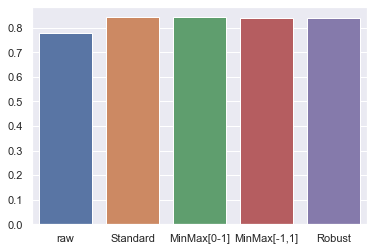

In [114]:
a = random_forest.score(X_validation, y_validation)
x = ['raw','Standard','MinMax[0-1]','MinMax[-1,1]','Robust']
y = [a,b,c,d,e]
print(a,b,c,d,e)
sns.barplot(x, y)

In [219]:
# features importances with the random forest attribute
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Age,0.254
Working Hours per week,0.131
Education Level,0.125
x5_Management,0.062
x5_Administratives,0.060
x5_Other services,0.057
x5_Professor,0.056
x5_Repair & constructions,0.047
Gender,0.031


# Grid search for NN

In [60]:
from sklearn.model_selection import GridSearchCV

parameter_space = {
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam']
}

clf = GridSearchCV(model, parameter_space)
# clf.fit(X_train, y_train)

# clf.best_params_
# {'activation': 'tanh', 'solver': 'adam'}

In [87]:
# clf.best_params_
# {'activation': 'tanh', 'solver': 'adam'}

{'activation': 'tanh', 'solver': 'adam'}

# RFE

In [244]:
X_train

,Education Level,Working Hours per week,Money Received,Ticket Price,Age,Lives with_Wife / Husband,Employment Sector_Other,Role_Management,Role_Professor,Gender,Marital Status_Other,Marital Status_Single,Lives with_Children,Lives with_Other Family,Employment Sector_Private Sector - Services,Role_Other services
CITIZEN_ID,,,,,,,,,,,,,,,,
30424.0,0.75,0.0,0.0,0.0,1.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
20700.0,-1.00,-6.4,0.0,0.0,-1.00,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
28452.0,-0.25,2.0,0.0,0.0,0.15,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29075.0,0.00,4.0,16667.0,0.0,-0.10,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
22251.0,-0.75,0.0,0.0,0.0,-0.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729.0,0.50,3.2,0.0,0.0,0.40,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
30375.0,0.75,2.0,18480.0,0.0,0.40,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15718.0,0.50,0.0,0.0,0.0,1.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0


In [245]:
# # Looking for the best number of feature considered by the RFE


#no of features
nof_list=np.arange(1,17)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    # we are going to see in the next class this "train_test_split()"...
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
    
    model = gb_model
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)

    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 13
Score with 13 features: 0.868493


In [246]:
# # Computing RFE with the best number of features found


rfe = RFE(estimator = gb_model, n_features_to_select = 13)

X_rfe = rfe.fit_transform(X = X_train, y = y_train)

random_forest.fit(X = X_rfe,y = y_train)

selected_features = pd.Series(rfe.support_, index = X_train.columns)
selected_features

Education Level                                  True
Working Hours per week                           True
Money Received                                   True
Ticket Price                                     True
Age                                              True
Lives with_Wife / Husband                        True
Employment Sector_Other                          True
Role_Management                                  True
Role_Professor                                   True
Gender                                           True
Marital Status_Other                            False
Marital Status_Single                            True
Lives with_Children                             False
Lives with_Other Family                         False
Employment Sector_Private Sector - Services      True
Role_Other services                              True
dtype: bool

In [247]:
selected_features[selected_features== True].index

Index(['Education Level', 'Working Hours per week', 'Money Received',
       'Ticket Price', 'Age', 'Lives with_Wife / Husband',
       'Employment Sector_Other', 'Role_Management', 'Role_Professor',
       'Gender', 'Marital Status_Single',
       'Employment Sector_Private Sector - Services ', 'Role_Other services'],
      dtype='object')